In [248]:
!pip install keras-tuner -q

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [3]:
raw_data = pd.read_csv('storedata_1668670608.csv')

In [4]:
raw_data.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [214]:
data = raw_data.drop(['Manager name'], axis = 1)

In [6]:
data.head()

,Town,Country,Store ID,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [356]:
data = raw_data.drop(['Town'], axis = 1)


In [357]:
data = data.drop(['Manager name'], axis = 1)


In [358]:
data['Country'] = data['Country'].map({"France":0, "UK":1})

In [359]:

data['Car park'] = data['Car park'].map({"No":0, "Yes":1})


In [360]:
data['Performance'] = data['Performance'].map({"Bad":0, "Good":1})


In [361]:
data['Location'] = data['Location'].map({"High Street":0, "Retail Park":1, "Shopping Centre":2, "Village":3})


In [362]:
data.loc[data['Country'] == 0, 'Country'] = 1


C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_32212\365871640.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Staff'], color = "green")


<Axes: xlabel='Staff', ylabel='Density'>

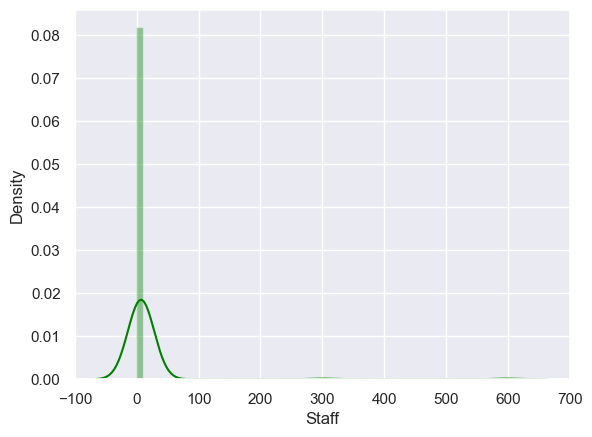

In [363]:
sns.distplot(data['Staff'], color = "green")

In [364]:
data['Staff'] = data['Staff'].abs()


In [365]:
data.columns

Index(['Country', 'Store ID', 'Staff', 'Floor Space', 'Window', 'Car park',
       'Demographic score', 'Location', '40min population',
       '30 min population', '20 min population', '10 min population',
       'Store age', 'Clearance space', 'Competition number',
       'Competition score', 'Performance'],
      dtype='object')

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_32212\365871640.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Staff'], color = "green")


<Axes: xlabel='Staff', ylabel='Density'>

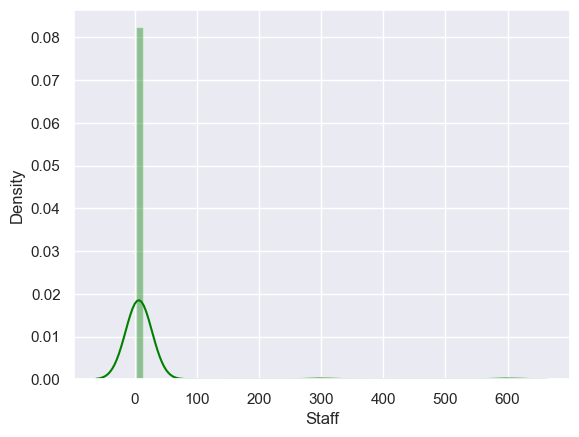

In [144]:
sns.distplot(data['Staff'], color = "green")

In [145]:
data['Staff']

0      9
1      8
2      2
3      7
4      7
      ..
131    7
132    6
133    7
134    6
135    9
Name: Staff, Length: 136, dtype: int64

In [376]:
data.isnull().sum()

Country               0
Store ID              0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [367]:
data = data.dropna(axis =0)


C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_32212\1036932785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Country'], color="red")
d:\Anaconda\envs\tf_gpucheck\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='Country', ylabel='Density'>

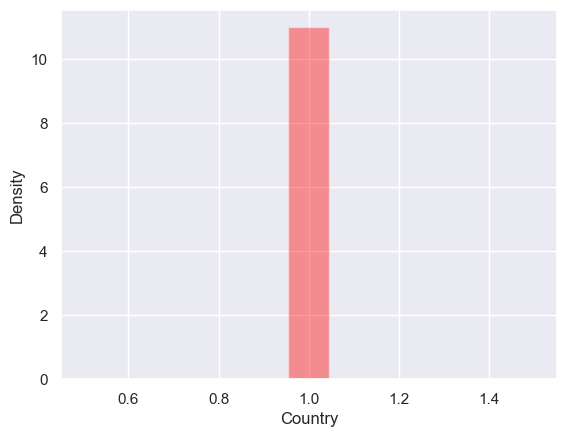

In [122]:
sns.distplot(data['Country'], color="red")

Country               0
Store ID              0
Staff                 0
Floor Space           0
Window                0
Car park              7
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [161]:
data.columns

Index(['Country', 'Store ID', 'Staff', 'Floor Space', 'Window', 'Car park',
       'Demographic score', 'Location', '40min population',
       '30 min population', '20 min population', '10 min population',
       'Store age', 'Clearance space', 'Competition number',
       'Competition score', 'Performance'],
      dtype='object')

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_32212\2727342760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['40min population'])


<Axes: xlabel='40min population', ylabel='Density'>

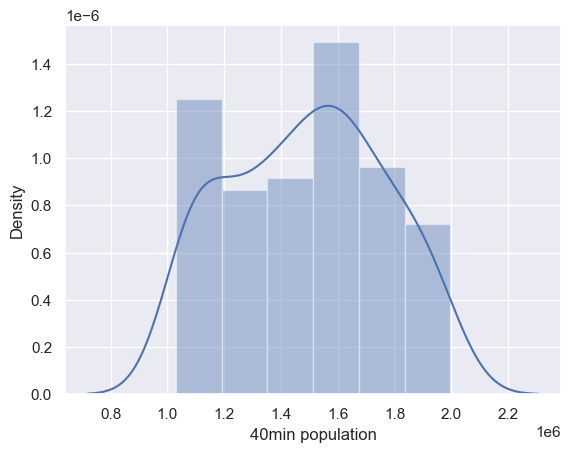

In [21]:
sns.distplot(data['40min population'])

In [179]:
targets

0      1
1      1
2      0
3      0
4      0
      ..
131    0
132    0
133    0
134    0
135    1
Name: Performance, Length: 129, dtype: int64

In [368]:
inputs = data.drop(['Performance'], axis = 1)
targets = data['Performance']

In [375]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.33,random_state = 0)

In [181]:
search_space = {'penalty': Categorical(['l1', 'l2']),
                'C': Real(0.1, 10, prior='log-uniform'),
                'solver': Categorical(['liblinear','saga']),
                'max_iter': Integer(50, 1000)}

In [182]:
lr = LogisticRegression()


In [183]:
bayes_cv = BayesSearchCV(lr, search_space, cv=10, n_iter=100, n_jobs=-1)

In [184]:
bayes_cv.fit(x_train, y_train)

d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=10, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
              search_spaces={'C': Real(low=0.1, high=10, prior='log-uniform', transform='normalize'),
                             'max_iter': Integer(low=50, high=1000, prior='uniform', transform='normalize'),
                             'penalty': Categorical(categories=('l1', 'l2'), prior=None),
                             'solver': Categorical(categories=('liblinear', 'saga'), prior=None)})

In [185]:
y_pred = bayes_cv.predict(x_test)

In [186]:
score = accuracy_score(y_test, y_pred)

In [187]:
print('Best hyperparameters:', bayes_cv.best_params_)

Best hyperparameters: OrderedDict([('C', 3.250095571636255), ('max_iter', 790), ('penalty', 'l1'), ('solver', 'liblinear')])


In [188]:
print('Accuracy score:', score)

Accuracy score: 0.8076923076923077


In [189]:
# compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print(conf_matrix)

[[ 8  3]
 [ 2 13]]


In [79]:
logr = LogisticRegression(C= 2.078156726099516, max_iter =50,penalty = "l1" , solver ="saga")


In [80]:
logr.fit(x_train, y_train)

d:\Anaconda\envs\tf_gpucheck\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=2.078156726099516, max_iter=50, penalty='l1',
                   solver='saga')

In [82]:
y_pred = logr.predict(x_test)
scores = accuracy_score(y_test, y_pred)
scores

0.5348837209302325

In [190]:
# Define the hyperparameter search space
search_space = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(2, 20),
    'min_samples_split': Integer(2, 50),
    'min_samples_leaf': Integer(1, 30),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'ccp_alpha': Real(0.0, 1.0),
    'class_weight': Categorical([None, 'balanced'])
}

# Define the Decision Tree
dt = DecisionTreeClassifier(random_state=0)


In [191]:
opt = BayesSearchCV(dt, search_space, n_iter=100, n_jobs=-1)

# Fit the BayesSearchCV object to the data
opt.fit(x_train, y_train)


d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluat

BayesSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_iter=100,
              n_jobs=-1,
              search_spaces={'ccp_alpha': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'class_weight': Categorical(categories=(None, 'balanced'), prior=None),
                             'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2', None), prior=None),
                             'min_samples_leaf': Integer(low=1, high=30, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=50, prior='uniform', transform='normalize')})

In [192]:
prediction = opt.predict(x_test)

In [193]:
score = accuracy_score(y_test, prediction)

In [194]:
print("Best hyperparameters:", opt.best_params_)
print("Accuracy on test set:", score)

Best hyperparameters: OrderedDict([('ccp_alpha', 0.0), ('class_weight', 'balanced'), ('criterion', 'entropy'), ('max_depth', 8), ('max_features', None), ('min_samples_leaf', 8), ('min_samples_split', 15)])
Accuracy on test set: 0.8461538461538461


In [195]:


# compute the confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

# print the confusion matrix
print(conf_matrix)

[[ 7  4]
 [ 0 15]]


In [126]:
import random
random.seed(0)

# Create the model
model = Sequential([
        keras.layers.Dense(64, activation='relu', input_shape =(16,) ),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),

        keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a learning rate schedule
opt = Adam(lr=1e-2)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=150, batch_size=64, validation_data=(x_test, y_test))


d:\Anaconda\envs\tf_gpucheck\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/150
2/2 [==============================] - 1s 171ms/step - loss: 58052.3086 - accuracy: 0.5930 - val_loss: 138245.1094 - val_accuracy: 0.4884
Epoch 2/150
2/2 [==============================] - 0s 39ms/step - loss: 107206.1641 - accuracy: 0.5000 - val_loss: 3422.2114 - val_accuracy: 0.5116
Epoch 3/150
2/2 [==============================] - 0s 27ms/step - loss: 7017.8530 - accuracy: 0.5000 - val_loss: 8384.6338 - val_accuracy: 0.5116
Epoch 4/150
2/2 [==============================] - 0s 29ms/step - loss: 7329.1753 - accuracy: 0.5116 - val_loss: 3574.2197 - val_accuracy: 0.5116
Epoch 5/150
2/2 [==============================] - 0s 64ms/step - loss: 6675.5029 - accuracy: 0.5233 - val_loss: 5377.3545 - val_accuracy: 0.4884
Epoch 6/150
2/2 [==============================] - 0s 47ms/step - loss: 6229.8301 - accuracy: 0.5465 - val_loss: 14938.8457 - val_accuracy: 0.5116
Epoch 7/150
2/2 [==============================] - 0s 43ms/step - loss: 14394.4277 - accuracy: 0.5000 - val_loss: 906

In [127]:
print("Highest validation accuracy:", max(history.history['val_accuracy']))

Highest validation accuracy: 0.6511628031730652


In [202]:
from keras.initializers import he_normal

model = Sequential([
    keras.layers.Dense(64, activation='relu', kernel_initializer=he_normal(), input_shape=(16,)),
    keras.layers.Dense(64, activation='relu', kernel_initializer=he_normal()),
    keras.layers.Dense(64, activation='relu', kernel_initializer=he_normal()),
    keras.layers.Dense(64, activation='relu', kernel_initializer=he_normal()),
    keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model with a learning rate schedule
opt = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

d:\Anaconda\envs\tf_gpucheck\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
2/2 [==============================] - 1s 161ms/step - loss: 122599.7734 - accuracy: 0.4660 - val_loss: 133553.2656 - val_accuracy: 0.4231
Epoch 2/100
2/2 [==============================] - 0s 72ms/step - loss: 86356.4297 - accuracy: 0.5146 - val_loss: 44694.6914 - val_accuracy: 0.4231
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 52717.2148 - accuracy: 0.4854 - val_loss: 51920.8477 - val_accuracy: 0.5769
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 36305.7852 - accuracy: 0.4854 - val_loss: 63357.5430 - val_accuracy: 0.4231
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 51623.1953 - accuracy: 0.5146 - val_loss: 42781.2227 - val_accuracy: 0.4231
Epoch 6/100
2/2 [==============================] - 0s 36ms/step - loss: 26179.3672 - accuracy: 0.5534 - val_loss: 27725.2383 - val_accuracy: 0.5769
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 27538.8203 - accuracy: 0.4854 - val_l

In [203]:
print("Highest validation accuracy:", max(history.history['val_accuracy']))


Highest validation accuracy: 0.7692307829856873


# Additional

In [222]:
data = data.drop(['30 min population'], axis = 1)

In [223]:
data = data.drop(['Window'], axis = 1)


C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_32212\2544434202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['10 min population'])


<Axes: xlabel='10 min population', ylabel='Density'>

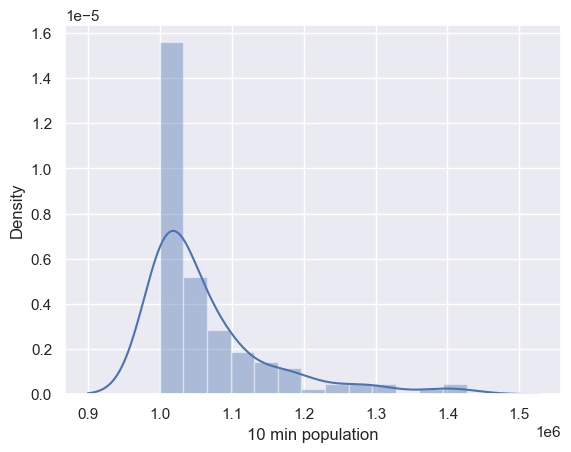

In [210]:
sns.distplot(data['10 min population'])

C:\Users\Aazhmeer Chhapra\AppData\Local\Temp\ipykernel_32212\1023278999.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data3['10 min population'])


<Axes: xlabel='10 min population', ylabel='Density'>

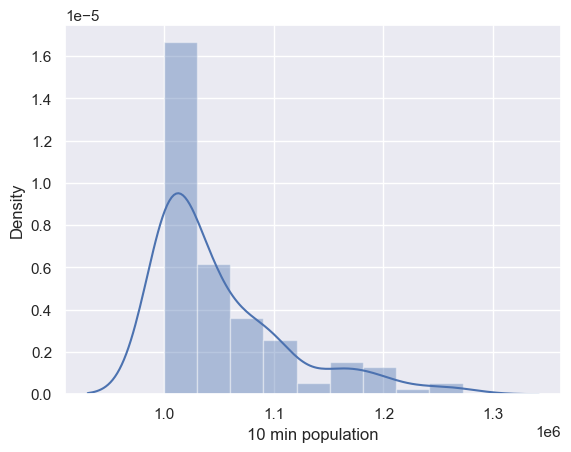

In [225]:
q = data['10 min population'].quantile(0.95)
data3 = data[data['10 min population']<q]
sns.distplot(data3['10 min population'])



In [270]:
inputs2 = data3.drop(['Performance'], axis = 1)
targets2 = data3['Performance']

In [271]:
x_train, x_test, y_train, y_test = train_test_split(inputs2, targets2, test_size = 0.2,random_state = 0)


In [272]:
data3.isnull().sum()


Country               0
Store ID              0
Staff                 0
Floor Space           0
Car park              0
Demographic score     0
Location              0
40min population      0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [233]:
data3 = data3.dropna(axis =0)

In [258]:
from scipy.stats import uniform
from keras.wrappers.scikit_learn import KerasClassifier
search_space = {'penalty': Categorical(['l1', 'l2']),
                'C': uniform(loc=0, scale=4),
                'solver': Categorical(['liblinear','saga']),
                'max_iter': np.arange(50, 1001)}

In [274]:
lr2 = LogisticRegression()

In [275]:
bayes_cv = RandomizedSearchCV(lr2, search_space, cv=5, n_iter=50, n_jobs=-1)


In [273]:
x_train.isnull().sum()
# x_train = x_train.dropna(axis=0)

Country               0
Store ID              0
Staff                 0
Floor Space           0
Car park              0
Demographic score     0
Location              0
40min population      0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
dtype: int64

In [276]:
bayes_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000021123DAC7C0>,
                                        'max_iter': array([  50,   51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
         61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
         72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
         94,   95,   96,   97,   98,   99...
        941,  942,  943,  944,  945,  946,  947,  948,  949,  950,  951,
        952,  953,  954,  955,  956,  957,  958,  959,  960,  961,  962,
        963,  964,  965,  966,  967,  968,  969,  970,  971,  972,  973,
        974,  975,  976,  977,  978,  979,  980,  981,  982,  983,  984,
        985,  986,  987,  988,  989,  990,  991,  992,  993,  994,  995,
        996,  997,  998,  999, 1000]),
                                        'penalty': Categorical(categories=('l1', 'l2'), prior=None),
                                        'solver': Categorical(categories=('liblinear', 'saga'), prior=None)})

In [277]:
y= bayes_cv.predict(x_test)

In [278]:
scoresss = accuracy_score(y_test, y)
scoresss

0.76

In [279]:
print("Best hyperparameters:", bayes_cv.best_params_)


Best hyperparameters: {'C': 0.5974016294971691, 'max_iter': 795, 'penalty': 'l1', 'solver': 'liblinear'}


In [312]:
search_space = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(1, 100),
    'min_samples_split': Integer(2, 50),
    'min_samples_leaf': Integer(2, 30),
    'max_features': Categorical(['sqrt', 'log2', None]),
    'ccp_alpha': Real(0.0, 1.0),
    'class_weight': Categorical([None, 'balanced'])
}

In [308]:
dts = DecisionTreeClassifier(random_state=4)

In [313]:
opts = BayesSearchCV(dts, search_space, n_iter=100, n_jobs=-1)

# Fit the BayesSearchCV object to the data
opts.fit(x_train, y_train)

BayesSearchCV(estimator=DecisionTreeClassifier(random_state=4), n_iter=100,
              n_jobs=-1,
              search_spaces={'ccp_alpha': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'class_weight': Categorical(categories=(None, 'balanced'), prior=None),
                             'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=1, high=100, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2', None), prior=None),
                             'min_samples_leaf': Integer(low=2, high=30, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=50, prior='uniform', transform='normalize')})

In [314]:
preds = opts.predict(x_test)
scoress = accuracy_score(y_test, preds)
scoress

0.52

In [294]:
print("Best hyperparameters:",opts.best_params_)


Best hyperparameters: OrderedDict([('ccp_alpha', 0.0), ('class_weight', None), ('criterion', 'entropy'), ('max_depth', 20), ('max_features', 'sqrt'), ('min_samples_leaf', 30), ('min_samples_split', 2)])


In [315]:
from keras.initializers import he_normal

model = Sequential([
    keras.layers.Dense(32, activation='relu', kernel_initializer=he_normal(), input_shape=(14,)),
    keras.layers.Dense(32, activation='relu', kernel_initializer=he_normal()),
    keras.layers.Dense(32, activation='relu', kernel_initializer=he_normal()),
    keras.layers.Dense(32, activation='relu', kernel_initializer=he_normal()),
    keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model with a learning rate schedule
opt = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

d:\Anaconda\envs\tf_gpucheck\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
2/2 [==============================] - 1s 172ms/step - loss: 127520.6094 - accuracy: 0.5306 - val_loss: 102740.0391 - val_accuracy: 0.3600
Epoch 2/100
2/2 [==============================] - 0s 46ms/step - loss: 58800.1016 - accuracy: 0.5306 - val_loss: 12750.1279 - val_accuracy: 0.3200
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 22672.5273 - accuracy: 0.5000 - val_loss: 33029.3789 - val_accuracy: 0.6400
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 46126.1875 - accuracy: 0.4694 - val_loss: 28970.3203 - val_accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 34100.2891 - accuracy: 0.4796 - val_loss: 13880.4180 - val_accuracy: 0.4000
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 7694.6958 - accuracy: 0.6224 - val_loss: 36203.8633 - val_accuracy: 0.3600
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 23545.5391 - accuracy: 0.5306 - val_lo

In [316]:
print("Highest validation accuracy:", max(history.history['val_accuracy']))


Highest validation accuracy: 0.6399999856948853


In [380]:
mlp_model = MLPClassifier()
score = cross_val_score(mlp_model, x_train, y_train, cv=5, scoring='accuracy')
print("Average accuracy: " + str(score))

Average accuracy: [0.5        0.58823529 0.52941176 0.47058824 0.52941176]


In [381]:
param_grid = {"hidden_layer_sizes": [(5), (10),(15)],
              "activation": ['identity', 'tanh','relu'],
              "solver": ['adam', 'sgd'],
              "alpha": [0.0001, 0.001, 0.01]}

In [382]:
splits = KFold(n_splits=5)

grid = BayesSearchCV(mlp_model, param_grid, cv=splits, n_jobs=-1).fit(x_train, y_train)

# Select the best estimators
mlp_model_tuned=grid.best_estimator_

# Output the results
print("Best Hyperparameters found: " + str(grid.best_params_))
print("Cross Validation accuracy: " + str(mlp_model_tuned.score(x_train,y_train)))

d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
d:\Anaconda\envs\tf_gpucheck\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluat

Best Hyperparameters found: OrderedDict([('activation', 'tanh'), ('alpha', 0.01), ('hidden_layer_sizes', 5), ('solver', 'adam')])
Cross Validation accuracy: 0.5


d:\Anaconda\envs\tf_gpucheck\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
